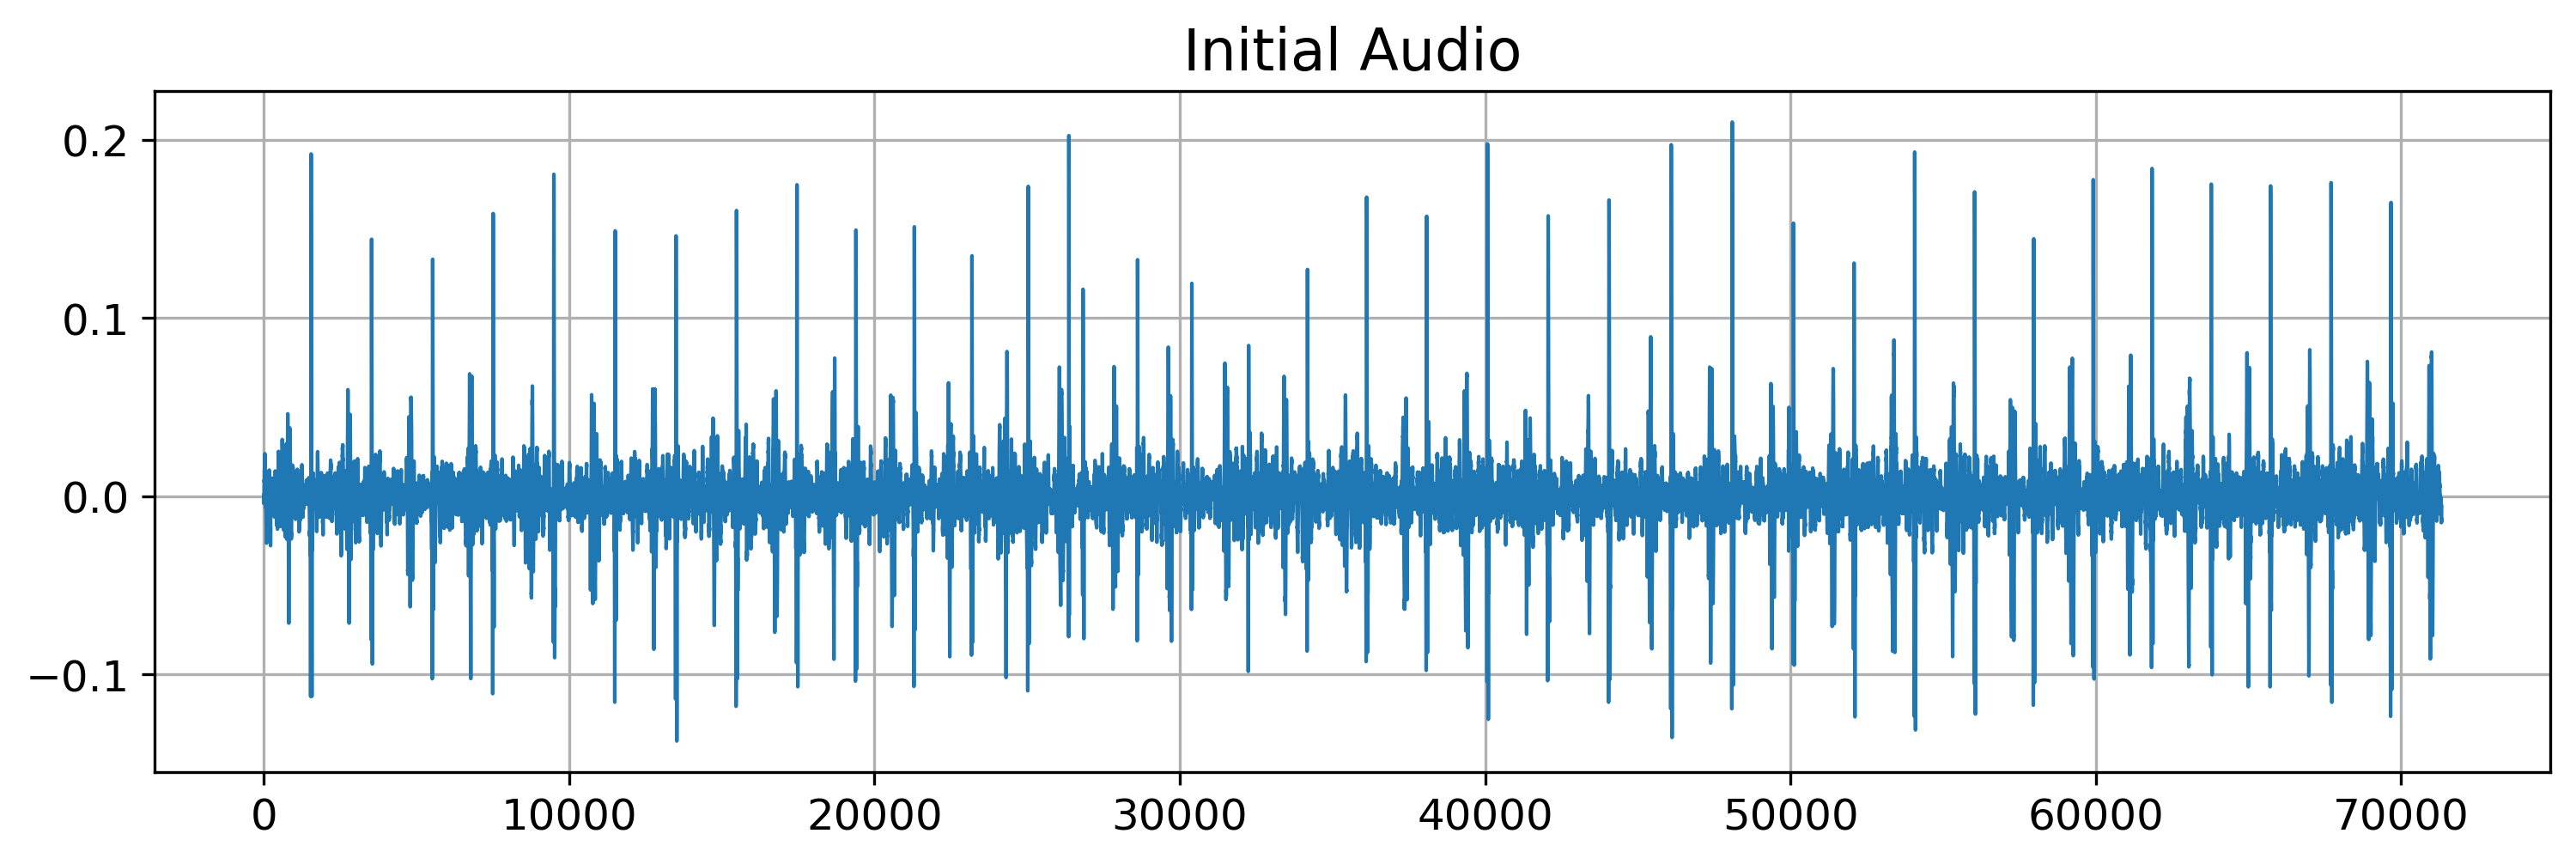

In [1]:
import librosa
import matplotlib.pyplot as plt
import samplerate


def plot_signal(audio_data, title=None):
    plt.figure(figsize=(12, 3.5), dpi=300)
    plt.plot(audio_data, linewidth=1)
    plt.title(title,fontsize = 16)
    plt.tick_params(labelsize=12)
    plt.grid()
    plt.show()


# 路径需根据实际情况修改，这里以数据集二的a0001.wav为例
audio_path = '../databases/database2/training-a/a0001.wav'
audio_data, fs = librosa.load(audio_path, sr=None)
plot_signal(audio_data, title='Initial Audio')


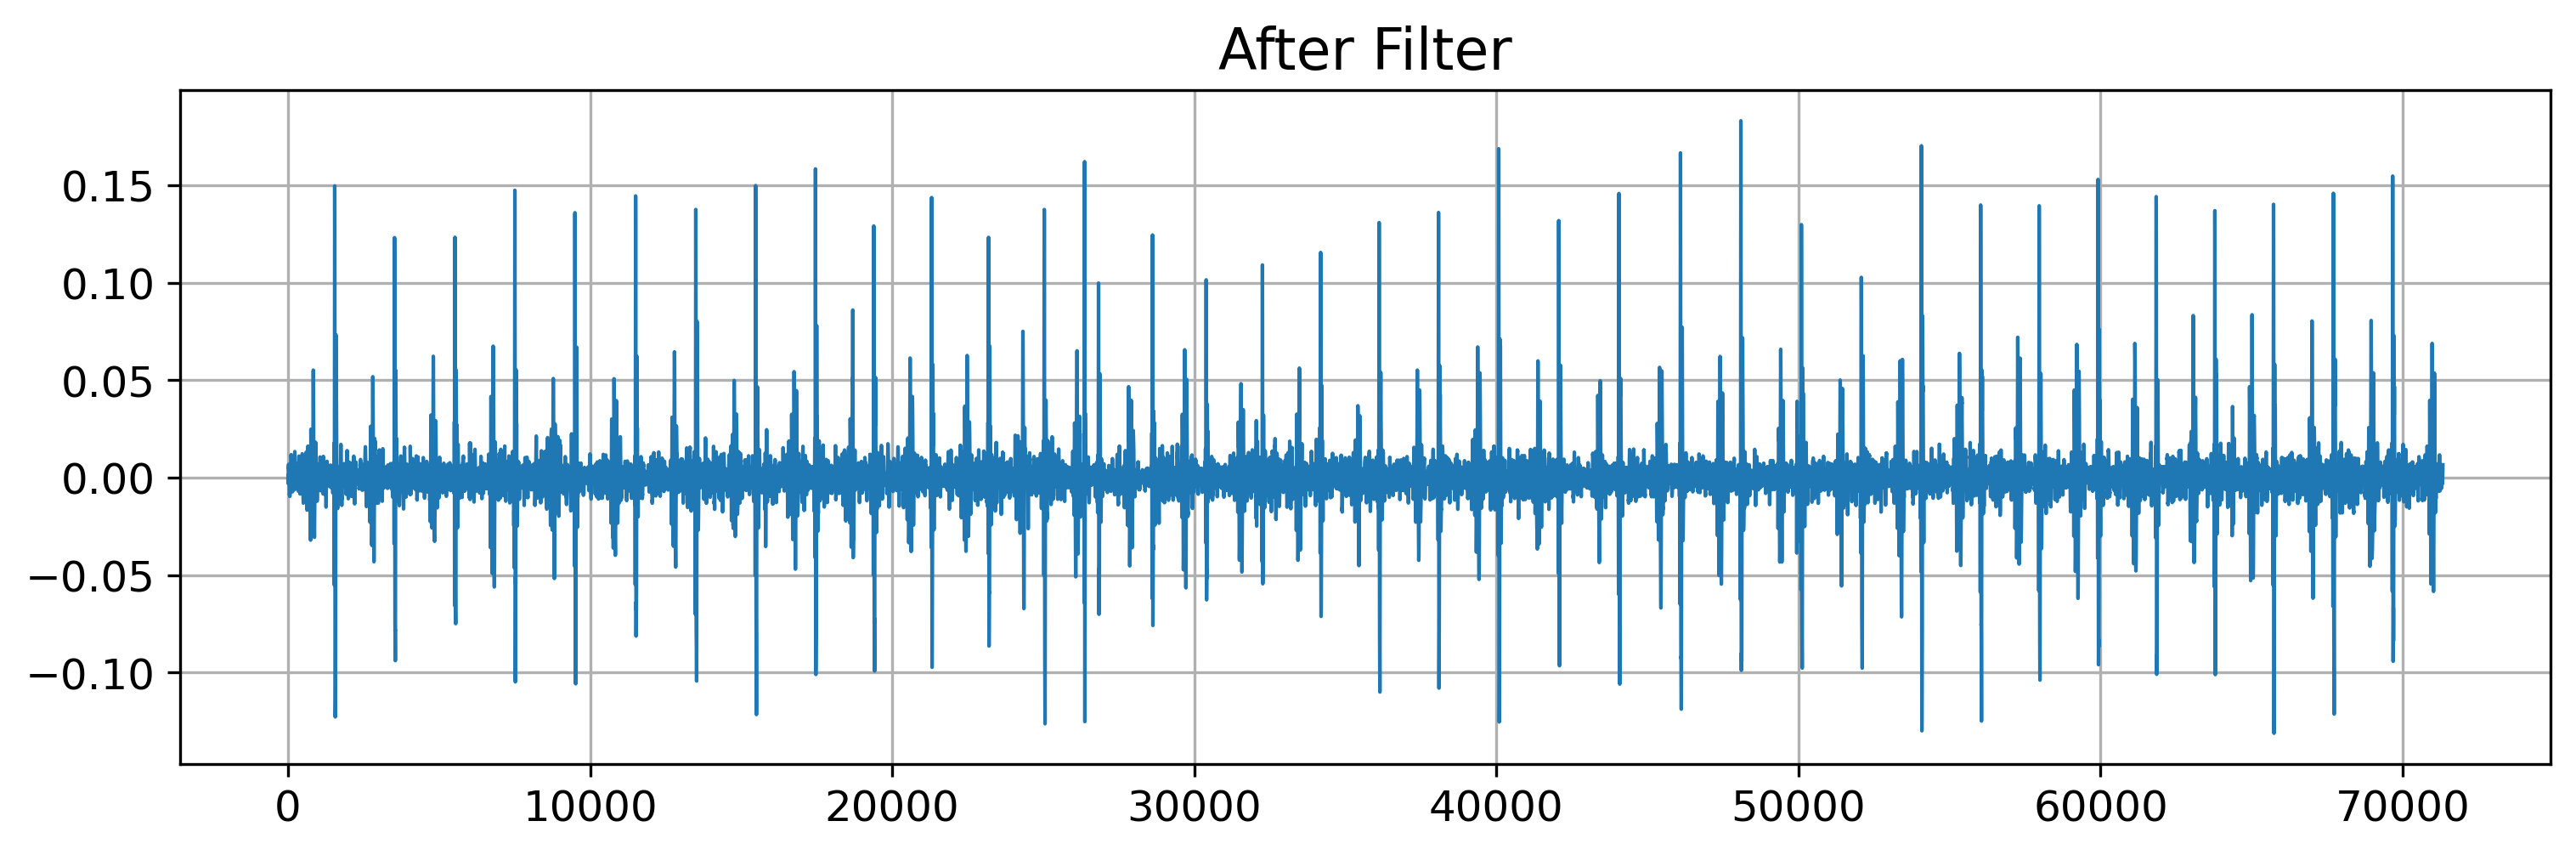

In [2]:
from scipy import signal
# 中值滤波，滤除噪声，尽可能保留心音信号
def band_pass_filter(original_signal, order, fc1,fc2, fs):
    b, a = signal.butter(N=order, Wn=[2*fc1/fs,2*fc2/fs], btype='bandpass')
    new_signal = signal.lfilter(b, a, original_signal)
    return new_signal


audio_data = band_pass_filter(audio_data, 2, 25, 400, fs)
plot_signal(audio_data, title='After Filter')

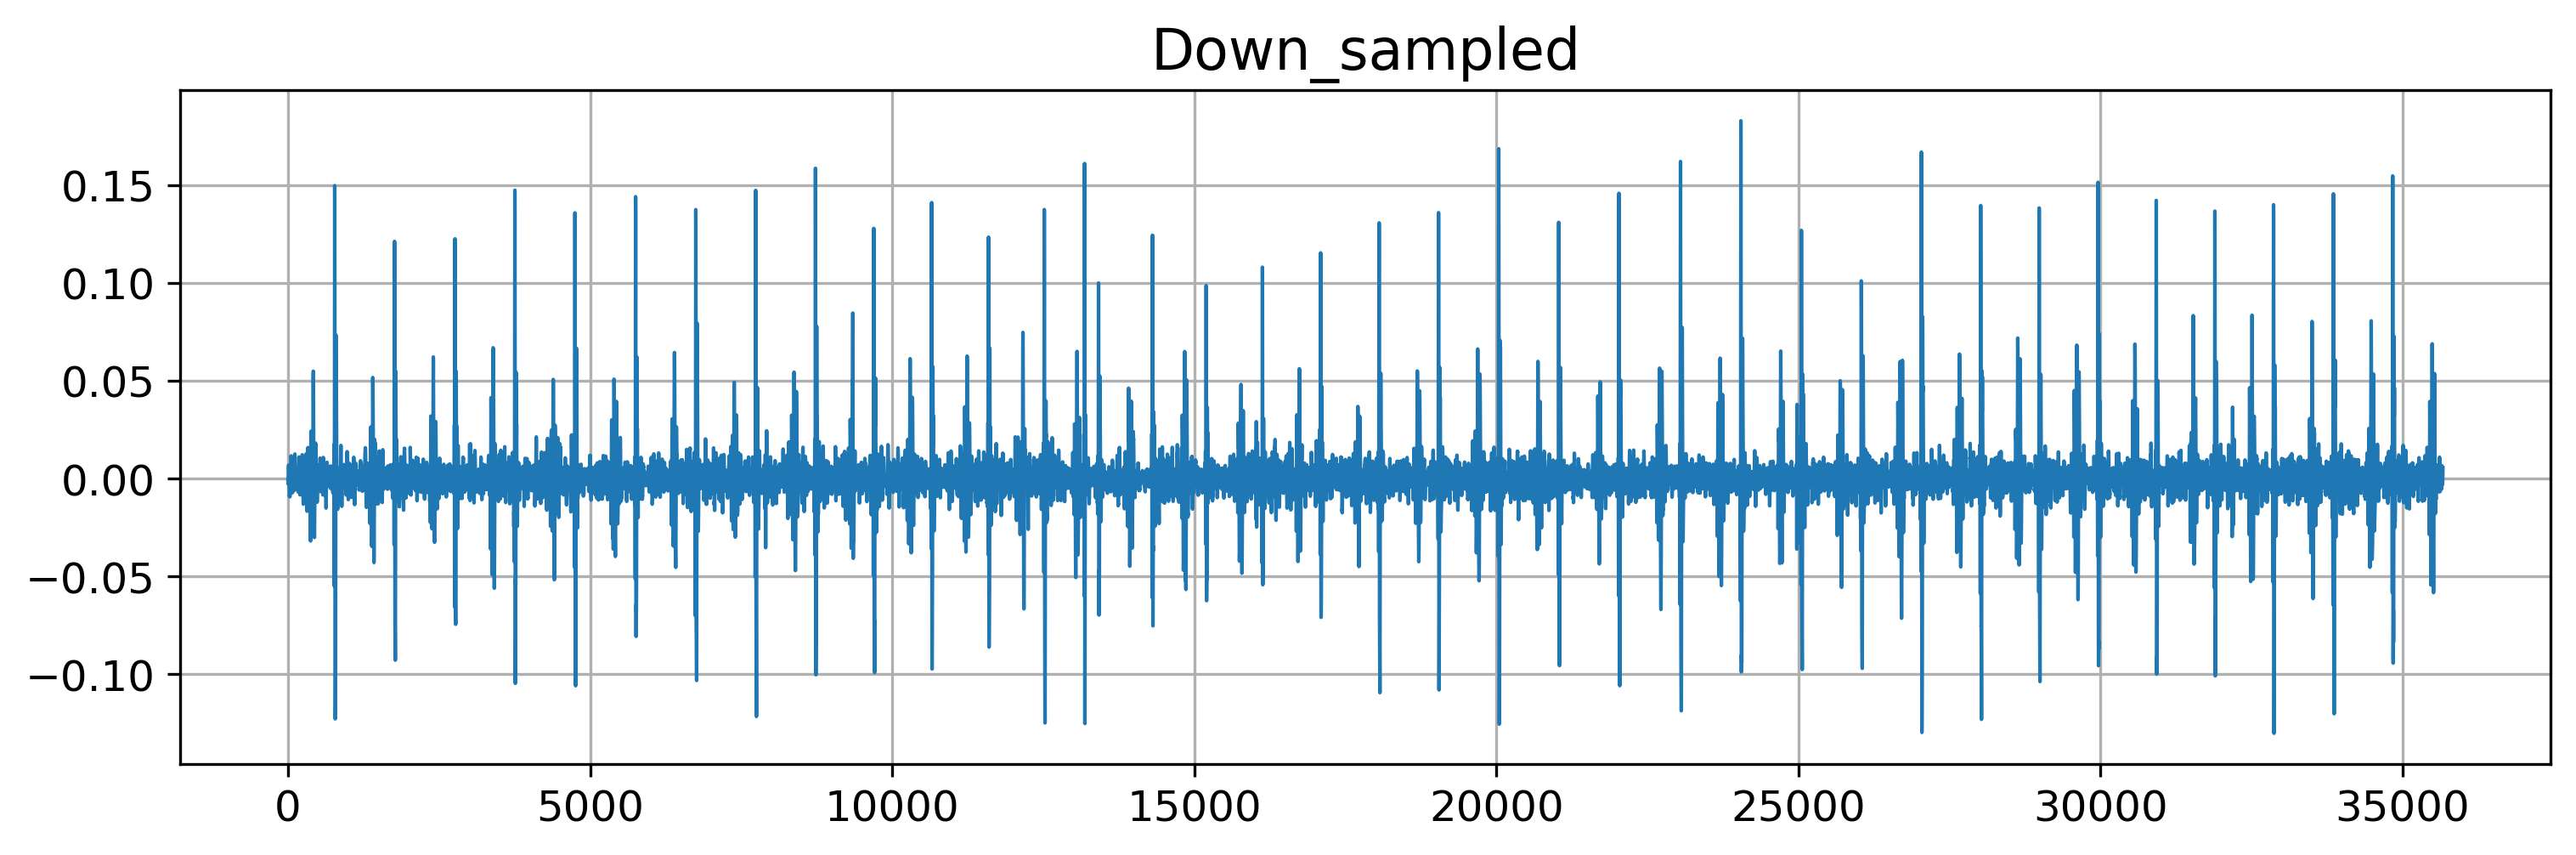

In [3]:
# 下采样
down_sample_audio_data = samplerate.resample(audio_data.T, 1000 / fs, converter_type='sinc_best').T
plot_signal(down_sample_audio_data, title='Down_sampled')

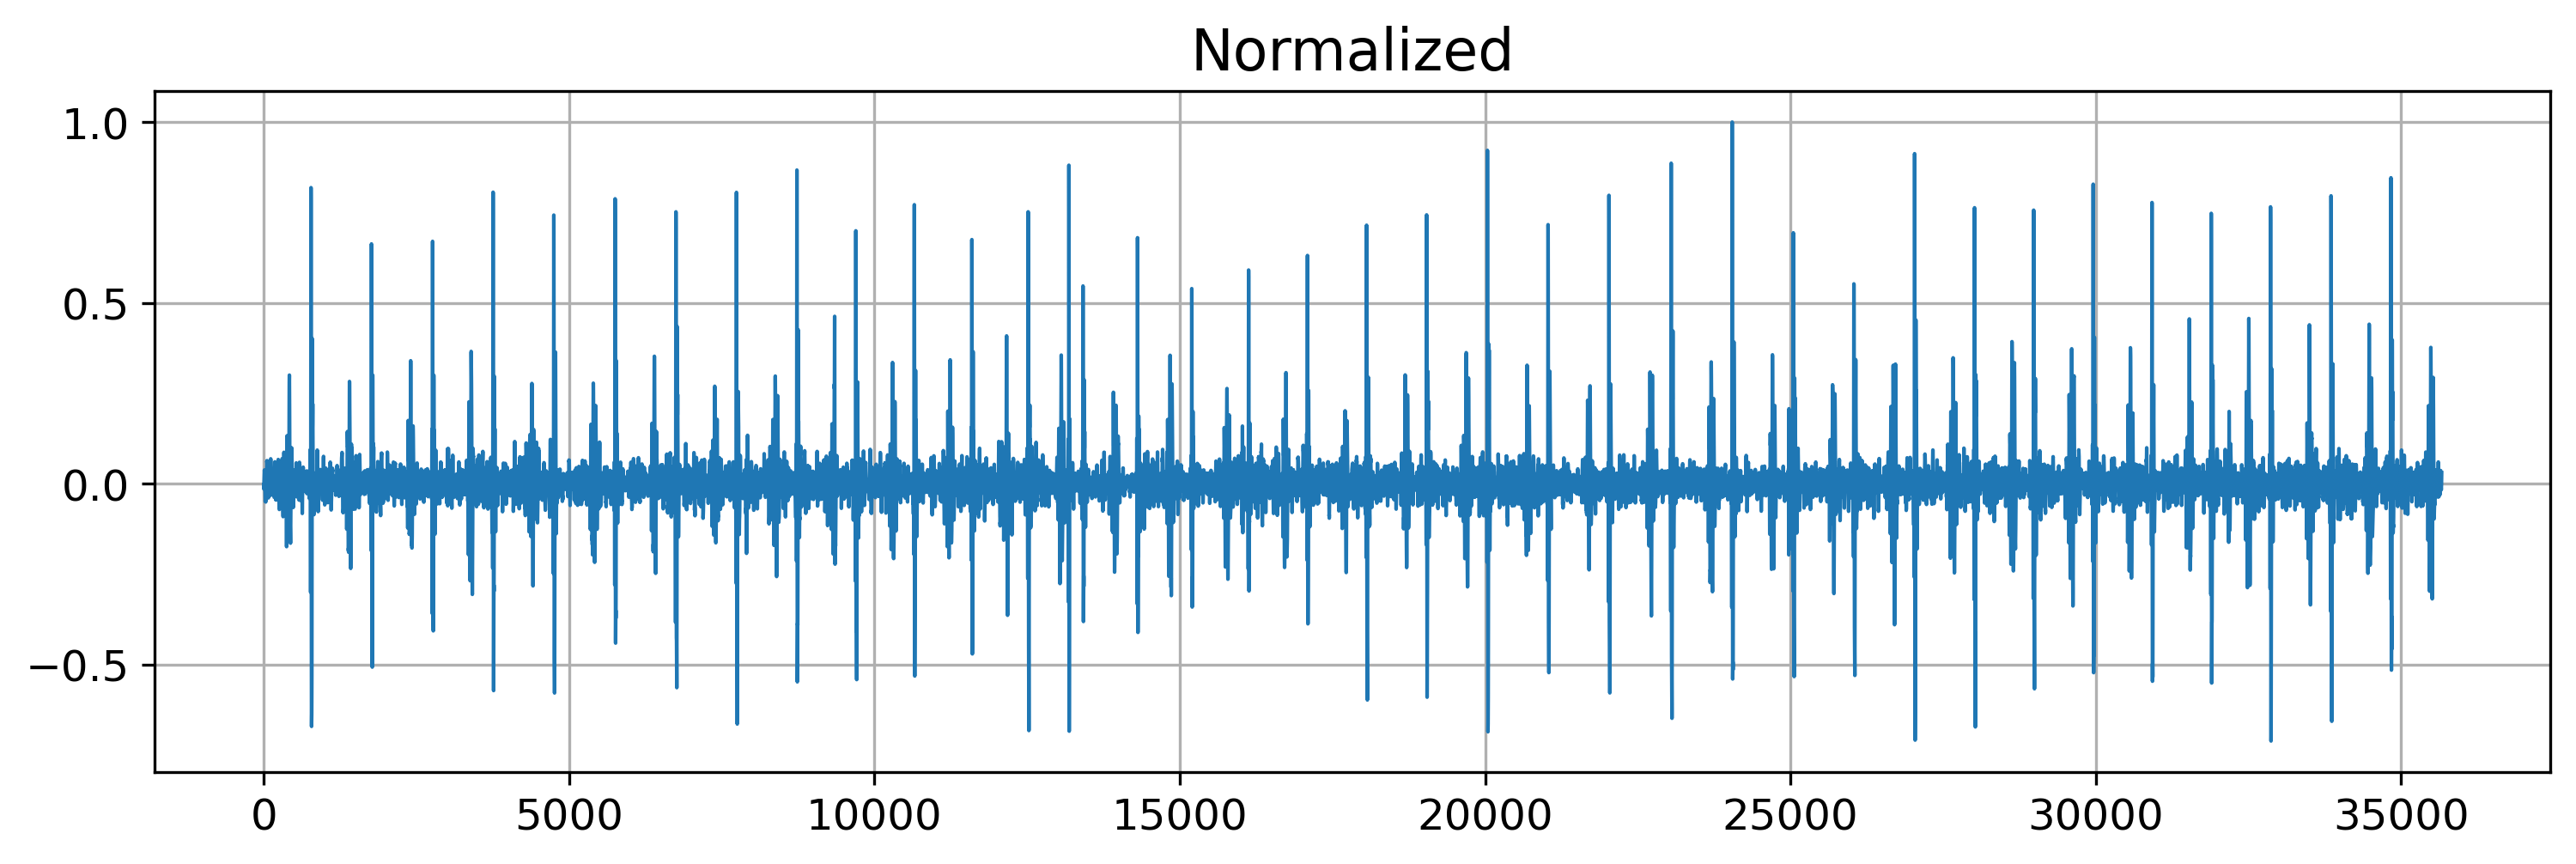

In [4]:
# 归一化
import numpy as np
down_sample_audio_data = down_sample_audio_data / np.max(np.abs(down_sample_audio_data))
plot_signal(down_sample_audio_data, title='Normalized')

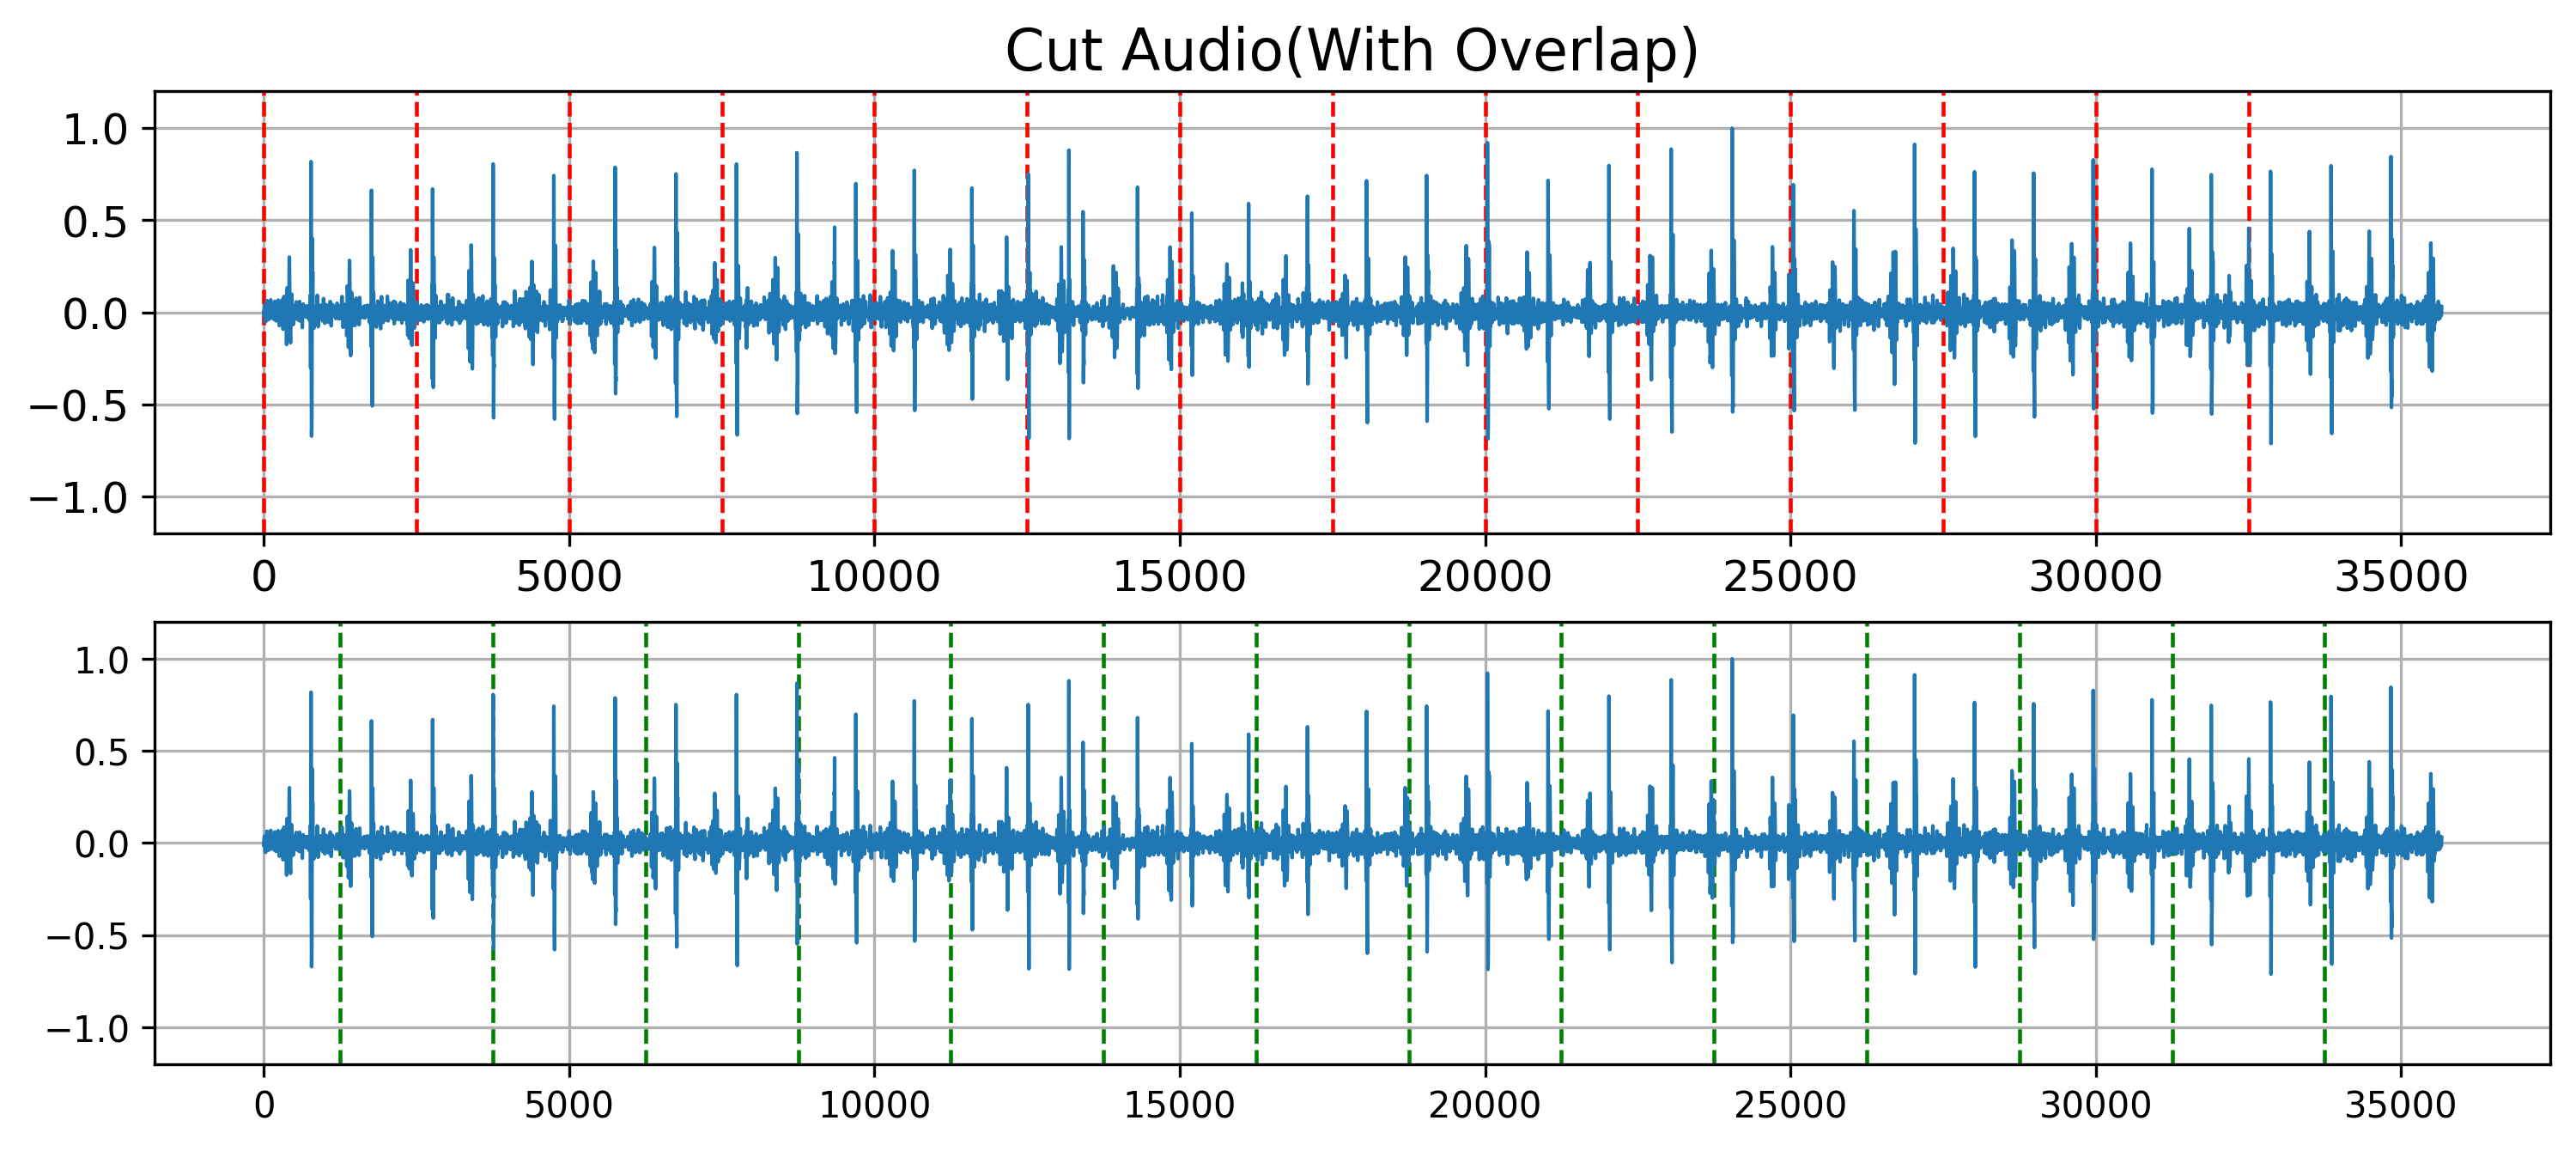

In [7]:
# 切割过程可视化
total_num = len(down_sample_audio_data)/(2500)

fig = plt.figure(figsize=(12, 5), dpi=300)
ax1 = fig.add_subplot(2,1,1)
plt.plot(down_sample_audio_data,linewidth=1)
plt.title('Cut Audio(With Overlap)',fontsize=16)
plt.tick_params(labelsize=12)
plt.ylim([-1.2,1.2])
plt.grid()
for j in range(int(total_num)):
    plt.vlines(j*2500, -1.2, 1.2, color="red",linestyle='--',linewidth=1.1)
ax2 = fig.add_subplot(2, 1, 2)
plt.plot(down_sample_audio_data, linewidth=1)
for j in range(int(total_num)):
    plt.vlines(j*2500 + 1250, -1.2, 1.2, color="green",linestyle='--',linewidth=1.1)
plt.ylim([-1.2,1.2])
plt.grid()
plt.show()

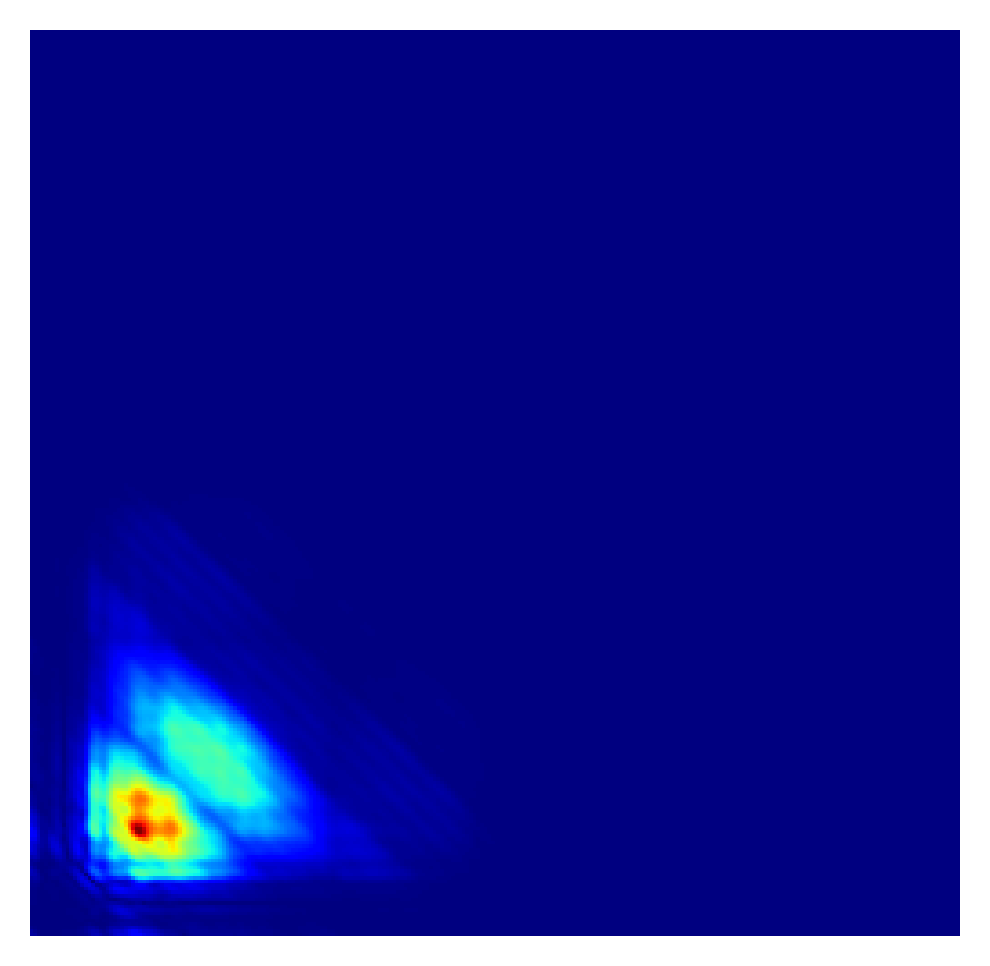

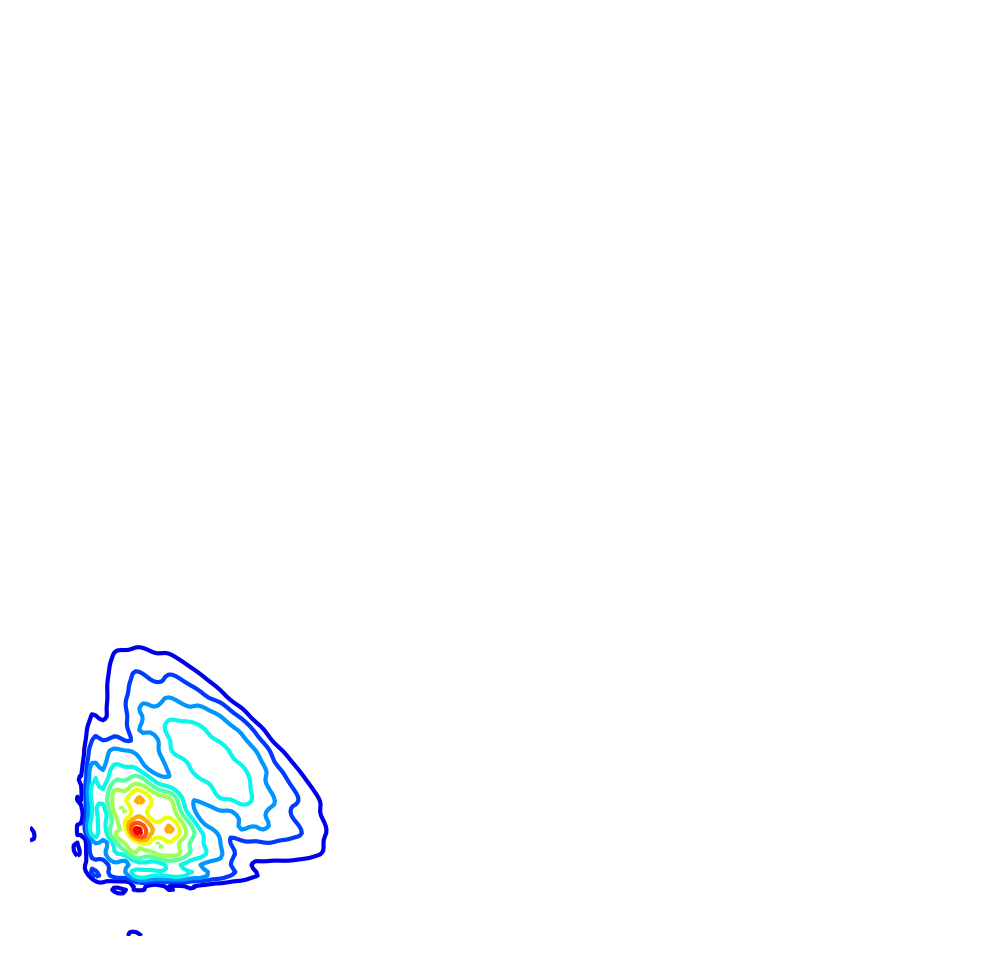

In [6]:
# 特征提取
from extract_bispectrum import polycoherence,plot_polycoherence

ex_audio_data = down_sample_audio_data[:2500]
freq1, freq2, bi_spectrum = polycoherence(ex_audio_data, nfft=1024, nperseg=256, noverlap = 100, fs = 1000, norm=None)
bi_spectrum = np.array(abs(bi_spectrum))  # calculate bi_spectrum
bi_spectrum = 255 * (bi_spectrum - np.min(bi_spectrum)) / (np.max(bi_spectrum) - np.min(bi_spectrum))
plot_polycoherence(freq1, freq2, bi_spectrum)
# 修改尺寸以便于投入神经网络
bi_spectrum = bi_spectrum.reshape((256, 256, 1))
# 至此，完成特征提取过程
